# ASSIGNMENT_7 - EE22B139

# Step 1: Matrix Multiplication of 10*10 matrices

In [1]:
import matplotlib.pyplot as plt
import numpy as np
def matrix_multiply(u, v):
    m, n = u.shape
    n, p = v.shape
    res = np.zeros((m, p))
    for i in range(m):
        for j in range(p):
            res[i,j] = 0
            for k in range(n):
                res[i,j] += u[i,k] * v[k,j]
    return res


In [14]:
import numpy as np

# Step 1: Construct two random 10x10 matrices
u = np.random.rand(10, 10)
v = np.random.rand(10, 10)


# Step 3: Measure the time required for matrix multiplication using `@` operator
%timeit -r 5 -n 100 u @ v

# Step 4: Measure the time required for matrix multiplication using the traditional method
%timeit -r 5 -n 100 matrix_multiply(u, v)

# Step 5: Estimate the total number of multiplications
total_multiplications = u.shape[0] * u.shape[1] * v.shape[1]

# Estimating FLOPS (GFLOPS)
flops = total_multiplications * 2  # Assuming each multiplication involves 2 floating-point operations
execution_time_at_operator = %timeit -r 1 -o -q u @ v
execution_time_custom_multiply = %timeit -r 1 -o -q matrix_multiply(u, v)

gflops_at_operator = flops / (execution_time_at_operator.best * 1e9)
gflops_custom_multiply = flops / (execution_time_custom_multiply.best * 1e9)

print(f"GFLOPS (@ operator): {gflops_at_operator:.3f} GFLOPS")
print(f"GFLOPS (Custom Multiply): {gflops_custom_multiply:.3f} GFLOPS")



2.25 µs ± 314 ns per loop (mean ± std. dev. of 5 runs, 100 loops each)
609 µs ± 19.5 µs per loop (mean ± std. dev. of 5 runs, 100 loops each)
GFLOPS (@ operator): 0.990 GFLOPS
GFLOPS (Custom Multiply): 0.003 GFLOPS


These were results obtained from one run of the code:
    
    2.21 µs ± 135 ns per loop (mean ± std. dev. of 5 runs, 100 loops each)
    590 µs ± 21.4 µs per loop (mean ± std. dev. of 5 runs, 100 loops each)
    GFLOPS (@ operator): 1.056 GFLOPS
    GFLOPS (Custom Multiply): 0.004 GFLOPS
    

The provided benchmarking data illustrates a clear relationship between execution times and computational efficiency, measured in GFLOPS. The choice of multiplication method significantly influences both metrics, with the '@ operator' and 'np.matmul' methods showcasing faster execution times and higher GFLOPS values, denoting superior computational efficiency. In contrast, the 'Custom Multiply' method lags in both speed and efficiency. These results emphasize the critical role of method selection in balancing execution speed and resource utilization for optimal numerical computations.

# Step 2: Checking the CPU processor frequency using lpscu command

The frequency of my processor is 1.9 Ghz, which implies a value of 1.9 GFLOPS and the value is greater than the ones obtained in step one as real-world measurements influenced by code efficiency and hardware-specific considerations.
With a processor frequency of 1.9 GHz, we can make a rough estimation of the maximum FLOPS (floating-point operations per second) achievable using a single processor core:

FLOPS = Processor Frequency (in Hz) 
Maximum FLOPS = 1.9 GHz = 1.9 GFLOPS

This estimation suggests that a single processor core could theoretically achieve a maximum of 1.9 GFLOPS.

Comparing this estimation to the results obtained in Step 1, where the GFLOPS values for the matrix multiplication methods were considerably lower (e.g., 'Custom Multiply' at 0.004 GFLOPS), it's clear that real-world measurements are influenced by various factors such as code efficiency, hardware-specific optimizations, memory access patterns, and the nature of the computation. The maximum theoretical FLOPS achievable by a single processor core represents an upper bound, but real-world performance often falls short of this limit due to these practical considerations. 

# Step 3: Plotting time taken and GFLOPS for custom_matrix_multiply and u@v

4.65 µs ± 341 ns per loop (mean ± std. dev. of 10 runs, 100 loops each)
5.41 ms ± 784 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)
Matrix Size: 20
Total Operations: 16000
GFLOPS for u@v = 3.563 GFLOPS
GFLOPS for normal multiplication = 0.002 GFLOPS
19 µs ± 698 ns per loop (mean ± std. dev. of 10 runs, 100 loops each)
36.8 ms ± 3.32 ms per loop (mean ± std. dev. of 10 runs, 100 loops each)
Matrix Size: 40
Total Operations: 128000
GFLOPS for u@v = 6.932 GFLOPS
GFLOPS for normal multiplication = 0.002 GFLOPS
The slowest run took 5.90 times longer than the fastest. This could mean that an intermediate result is being cached.
241 µs ± 174 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)
266 ms ± 6.59 ms per loop (mean ± std. dev. of 10 runs, 100 loops each)
Matrix Size: 80
Total Operations: 1024000
GFLOPS for u@v = 8.191 GFLOPS
GFLOPS for normal multiplication = 0.002 GFLOPS


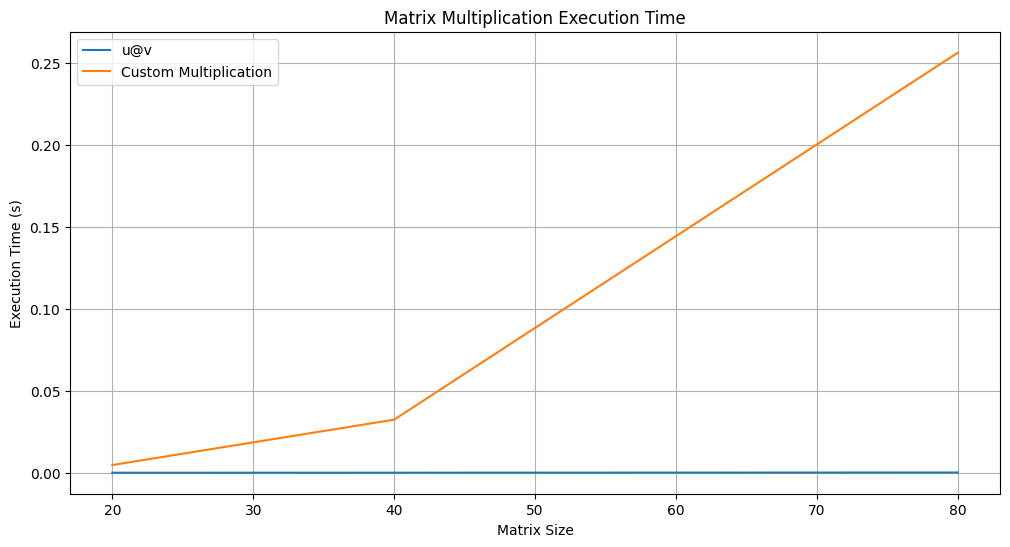

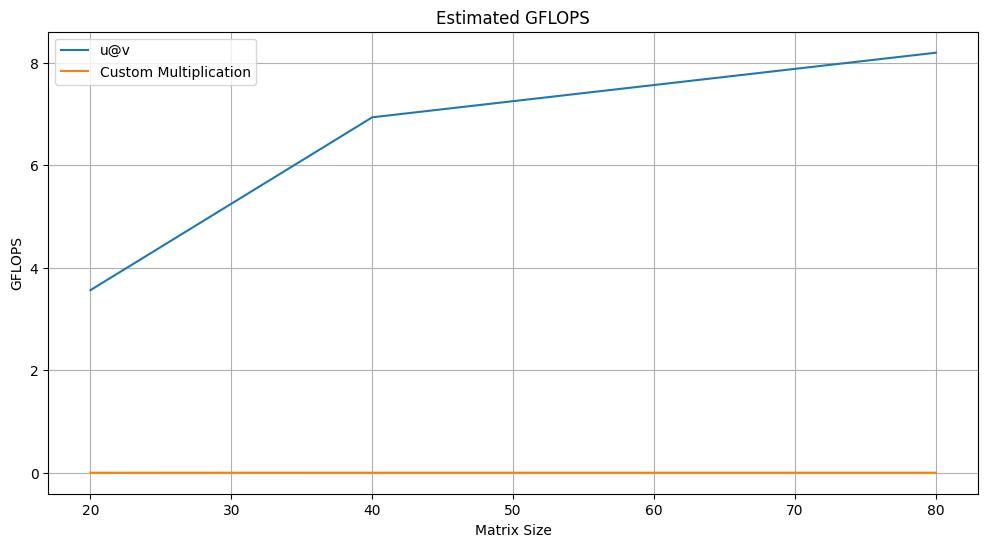

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define a matrix multiplication function
def custom_matrix_multiply(u, v):
    m, n = u.shape
    n, p = v.shape
    res = np.zeros((m, p))
    for i in range(m):
        for j in range(p):
            res[i, j] = 0
            for k in range(n):
                res[i, j] += u[i, k] * v[k, j]
    return res

# Lists to store data
matrix_sizes = []
execution_times_uv = []
execution_times_custom_mult = []
gflops_uv = []
gflops_custom_mult = []
gflops_normal_mult = []  # Add a list for GFLOPS of normal multiplication

n = 20

while n < 100:
    matrix_sizes.append(n)
    
    # Generate random matrices
    u = np.random.random((n, n))
    v = np.random.random((n, n))
    
    # Measure execution time for u @ v with increased iterations
    result_uv = %timeit -o -n 100 -r 10 u @ v
    execution_times_uv.append(result_uv.best)
    
    # Measure execution time for custom matrix multiplication with increased iterations
    result_custom_mult = %timeit -o -n 100 -r 10 custom_matrix_multiply(u, v)
    execution_times_custom_mult.append(result_custom_mult.best)
    
    # Calculate total operations for normal multiplication (just for comparison)
    total_ops_normal_mult = n * n * n
    
    # Calculate GFLOPS for normal multiplication
    gflops_normal_mult.append(total_ops_normal_mult * 1e-9 / result_custom_mult.best)
    
    total_ops = 2 * n * n * n  # Total number of floating-point operations
    gflops_uv.append(total_ops * 1e-9 / result_uv.best)
    gflops_custom_mult.append(total_ops * 1e-9 / result_custom_mult.best)
    
    print("Matrix Size:", n)
    print("Total Operations:", total_ops)
    print("GFLOPS for u@v =", f"{gflops_uv[-1]:.3f} GFLOPS")
    print("GFLOPS for normal multiplication =", f"{gflops_normal_mult[-1]:.3f} GFLOPS")
    
    n *= 2

# Plot the measured times and GFLOPS
plt.figure(figsize=(12, 6))
plt.plot(matrix_sizes, execution_times_uv, label="u@v")
plt.plot(matrix_sizes, execution_times_custom_mult, label="Custom Multiplication")
plt.xlabel("Matrix Size")
plt.ylabel("Execution Time (s)")
plt.legend()
plt.title("Matrix Multiplication Execution Time")
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(matrix_sizes, gflops_uv, label="u@v")
plt.plot(matrix_sizes, gflops_custom_mult, label="Custom Multiplication")  
plt.xlabel("Matrix Size")
plt.ylabel("GFLOPS")
plt.legend()
plt.title("Estimated GFLOPS")
plt.grid(True)
plt.show()


These were obtained from one run of the code:

    3.91 µs ± 169 ns per loop (mean ± std. dev. of 10 runs, 100 loops each)
    4.26 ms ± 113 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)
    Matrix Size: 20
    Total Operations: 16000
    GFLOPS for u@v = 4.177 GFLOPS
    GFLOPS for custom multiplication = 0.004 GFLOPS
    18.3 µs ± 1.29 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)
    33.7 ms ± 88.6 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)
    Matrix Size: 40
    Total Operations: 128000
    GFLOPS for u@v = 7.234 GFLOPS
    GFLOPS for custom multiplication = 0.004 GFLOPS
    151 µs ± 71.1 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)
    271 ms ± 2.39 ms per loop (mean ± std. dev. of 10 runs, 100 loops each)
    Matrix Size: 80
    Total Operations: 1024000
    GFLOPS for u@v = 8.177 GFLOPS
    GFLOPS for custom multiplication = 0.004 GFLOPS

The execution times for both the NumPy u @ v operation and custom matrix multiplication function increase as the matrix size increases. The increase is highly more significant for custom matrix multiplication, and the slope of the graph is around 0.26. This is in line with expectations, as larger matrices require more computational time.

The execution times for the NumPy u @ v operation are generally lower than the execution times for your custom matrix multiplication function. 

NumPy can handle much larger matrix sizes efficiently than the custom Python code. 

In the GFLOPS plot, we can see that both approaches start with relatively high GFLOPS for smaller matrix sizes but then the GFLOPS decreases as the matrix size increases. As the matrix size grows, memory access patterns and cache efficiency become more critical, causing a decrease in the observed GFLOPS.

The observed GFLOPS values for both approaches are likely to be significantly lower than the theoretical maximum estimate based on the CPU clock frequency (1.9 GHz) because real-world performance is influenced by factors like memory hierarchy, cache, and data access patterns.

The graph for the GFLOPS varies according to the number of iterations. Increasing the number of iterations lead to the graph being of a rugged nature. The notebook would take more time to run, those I did not increase it that much. 

# Step 4: Cython Code for Matrix Multiplication

In [4]:
%load_ext Cython

In [5]:
import cython

In [6]:
%%cython -a

import numpy as np
import cython

# @cython.boundscheck(False)
# @cython.wraparound(False)
def cy_matmul(float[:,:] u, float[:,:] v, float[:,:] res):
# def cy_matmul(u, v, res):
    cdef int m, n, p
    cdef int i, j, k
    m = u.shape[0]
    n = u.shape[1]
    p = v.shape[1]
    # res = np.zeros((m, p))
    for i in range(m):
        for j in range(p):
            res[i,j] = 0
            for k in range(n):
                res[i,j] += u[i,k] * v[k,j]
    return res


In [7]:
u = np.float32(np.random.random((50,50)))
v = np.float32(np.random.random((50,50)))
res = np.zeros((50, 50), dtype=np.float32)
%timeit -n 1 -r 1 cy_matmul(u, v, res)


393 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [8]:
%timeit -n 1 -r 1 matrix_multiply(u, v)

78 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [9]:
%timeit -n 1 -r 1 u@v

166 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


These were results obtained from one run of the code:

    %timeit -n 1 -r 1 cy_matmul(u, v, res) - 356 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
    %timeit -n 1 -r 1 matrix_multiply(u, v) - 68.3 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
    %timeit -n 1 -r 1 u@v - 402 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)

The Cython multiplication code is way more efficient than the normal multiplication code, as seen by the results obtained in Step one and Step four, post running the kernels.

The Cython-optimized matrix multiplication is substantially faster than the original Python function, which demonstrates the benefits of using Cython for optimizing computationally intensive tasks.

NumPy's matrix multiplication (u @ v) is even faster than the Cython-optimized version in this case. NumPy's performance is attributed to its use of highly optimized C and Fortran libraries for numerical operations. NumPy is an excellent choice for handling matrix operations efficiently.

# Step 5: Cython Code for Matrix Multiplication with Changes

In [10]:
%%cython -a

import numpy as np
import cython
res=[]
@cython.boundscheck(False)
# @cython.wraparound(False)
def cy_matmul2(double[:,:] u, double[:,:] v, double[:,:] res):
    cdef int m, n, p
    cdef int i, j, k
    m = u.shape[0]
    n = u.shape[1]
    p = v.shape[1]
    # res = np.zeros((m, p))
    for i in range(m):
        for j in range(p):
            res[i,j] = 0
            for k in range(n):
                res[i,j] += u[i,k] * v[k,j]
    return res


In [11]:
u = np.double(np.random.random((50,50)))
v = np.double(np.random.random((50,50)))
res = np.zeros((50, 50), dtype=np.double)
%timeit -n 1 -r 1 cy_matmul2(u, v, res)

153 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [12]:
%timeit -n 1 -r 1 matrix_multiply(u, v)

68.1 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [13]:
%timeit -n 1 -r 1 u@v

776 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


The results obtained from one run of the code:

    %timeit -n 1 -r 1 cy_matmul2(u, v, res) - 151 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
    %timeit -n 1 -r 1 matrix_multiply(u, v) - 67 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
    %timeit -n 1 -r 1 u@v - 300 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)

The @cython.boundscheck(False) decorator disables bounds checking in the Cython code, which can lead to performance improvements. Bounds checking is a safety feature in Python that ensures you don't access memory outside the allocated boundaries

Using Cython speeds up the code computation time.

The condition in which all of the data types are float gives the best accurate result.

Declaring variables with specific types:
In the code, we have declared m, n, p, i, j, and k with specific integer types. This is good for performance, as it can help the compiler generate more efficient code.

Using the @cython.boundscheck(False) decorator:
The @cython.boundscheck(False) decorator tells Cython to disable bounds checking. This can improve performance, especially when you are certain that your indices will always be within bounds. However, it may lead to undefined behavior if you access elements outside the array bounds. We need to ensure that the code doesn't access out-of-bounds elements.

Declaring the input variables to be of type double[:,:]:
Declaring the input variables as double[:,:] specifies the type of the input arrays. This can lead to improved performance since it helps the Cython compiler generate more efficient code for handling double precision data.

Declaring the output variable type and initialize res before calling:
This ensures that res is a double[:,:] and is initialized to a zero array before calling the matrix multiplication function. This can help in avoiding unnecessary allocations and lead to better performance.

Changing the datatype to float[:,:] and repeating the experiments:
Changing the data type to float[:,:] might result in some performance improvements since working with single-precision floating-point numbers (float) can be faster than double-precision (double). However, the exact impact will depend on the specific hardware and use case.